# KNN
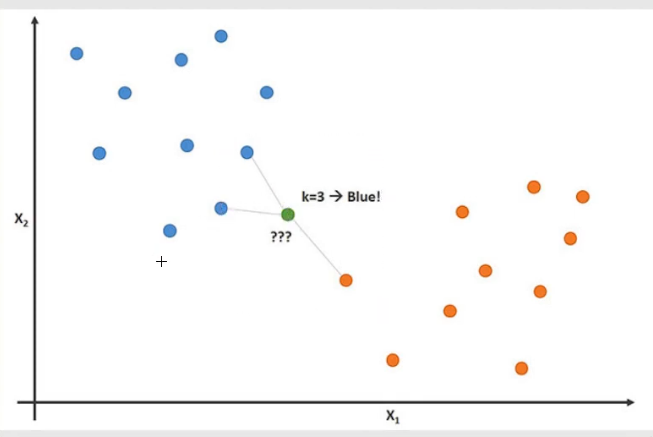

# Calculating Euclidean Distance
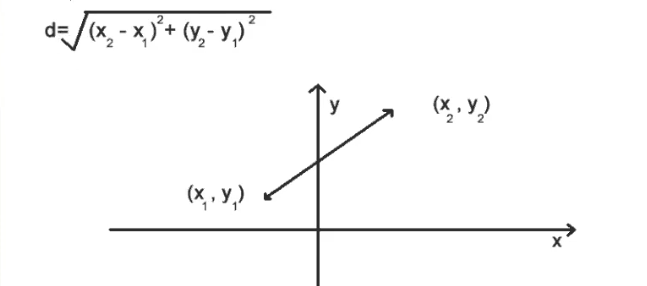

In [16]:
import numpy as np
from collections import Counter

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    def __init__(self,k):
        self.k = k

    def fit(self,X,y):
        self.X_train = X
        self.y_train = y

    def predict(self,X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    

    def _predict(self,x):
        # compute distances
        distances = [euclidean_distance(x,x_train) for x_train in self.X_train]

        # get k nearest samples, labels
        k_indicies = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indicies]

        # majority vote most common class label
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

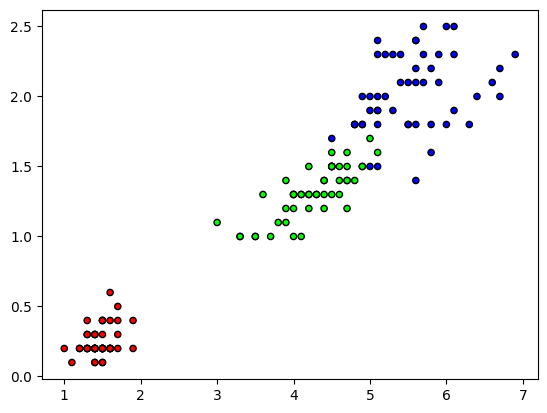

[1 2 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]
0.9666666666666667


In [23]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()


clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)

acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

In [24]:
import numpy as np

arr = np.array([40, 10, 20, 30])
sorted_indices = np.argsort(arr)
print(sorted_indices)

[1 2 3 0]
